# Project 1. Customer Churn Prediction.
This project considers a prediction problem arising at a mobile phone operator AT with regard
to customer churn, customer who leave a company for others. Predictive models are built to help the
company AT predict the customer churn. The solution includes the developing a full predictive data
analytics solution to this business problem. Based on the nature of the data, two methodologies, Multivariate Logistic Regression and Iterative Dichotomiser 3 algorithms, are employed to build modelsto solve
the problem using Python. The two models are compared with respect to their performance such as the
accuracy before improvement and after improvement to help the manager of AT to reduce the customer
churn. Six steps of CRISP-DM are implemented to achieve the solution. The six steps are Business
Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. Initial
findings show promising results as the models achieved reasonable accuracies to predict the churn.

### Import Libraries as needed

In [1]:
import pandas as pd               # Data processing, CSV file I/O (pd.read_CSV)
import numpy as np                # Linear algebra
import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns             # Statistical data visualization
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Read the dataset into Notebook

In [3]:
data = 'ChurnCustomer.csv'
df = pd.read_csv(data)

# Section 1. Performing Exploratory Data Analysis (EDA)

In [4]:
# View the dimension of dataset
df.shape

(10000, 33)

In [5]:
# Preview the dataset

df.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,,,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [6]:
col_names = df.columns

col_names

Index(['customer', 'age', 'occupation', 'regionType', 'marriageStatus',
       'children', 'income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', 'creditRating', 'homeOwner', 'creditCard',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn'],
      dtype='object')

In [7]:
# View summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer                    10000 non-null  int64  
 1   age                         10000 non-null  int64  
 2   occupation                  10000 non-null  object 
 3   regionType                  10000 non-null  object 
 4   marriageStatus              10000 non-null  object 
 5   children                    10000 non-null  object 
 6   income                      10000 non-null  int64  
 7   numHandsets                 10000 non-null  int64  
 8   handsetAge                  10000 non-null  int64  
 9   smartPhone                  10000 non-null  object 
 10  currentHandsetPrice         10000 non-null  float64
 11  creditRating                10000 non-null  object 
 12  homeOwner                   10000 non-null  object 
 13  creditCard                  1000

### Types of Variables: We segregate (separate) the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object while numerical variables have data type float64.

In [8]:
# Find categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 9 categorical variables

The categorical variables are : ['occupation', 'regionType', 'marriageStatus', 'children', 'smartPhone', 'creditRating', 'homeOwner', 'creditCard', 'churn']


In [9]:
# View the categorical variables

df[categorical].head()

,occupation,regionType,marriageStatus,children,smartPhone,creditRating,homeOwner,creditCard,churn
0,crafts,town,yes,true,false,C,true,true,false
1,,,yes,true,true,A,false,true,false
2,professional,town,yes,false,true,A,false,true,false
3,,suburban,no,false,true,C,false,true,false
4,,town,yes,false,true,A,false,true,false


### Check missing values in categorical variables

In [10]:
df[categorical].isnull().sum()

occupation        0
regionType        0
marriageStatus    0
children          0
smartPhone        0
creditRating      0
homeOwner         0
creditCard        0
churn             0
dtype: int64

### Print categorical variables containing missing values

In [11]:
cat1 = [var for var in categorical if df[var].isnull().sum() !=0]
       # for var in categorical:
       #      if df[var].isnull().sum() != 0:
       #          cat1 = var
print(df[cat1].isnull().sum())

Series([], dtype: float64)


### Check the frequency counts categorical variables

In [12]:
for var in categorical:
    print(df[var].value_counts())

                  7400
 professional     1705
 crafts            274
 clerical          210
 self-employed     181
 retired           133
 student            78
 homemaker          19
Name: occupation, dtype: int64
             4776
 suburban    3085
 town        1483
 rural        491
 unknown       83
 s             55
 t             20
 r              7
Name: regionType, dtype: int64
 unknown    3920
 yes        3594
 no         2486
Name: marriageStatus, dtype: int64
 false    7559
 true     2441
Name: children, dtype: int64
 true     9015
 false     985
Name: smartPhone, dtype: int64
 B    3785
 C    1713
 A    1695
 E    1175
 D     979
 G     413
 F     240
Name: creditRating, dtype: int64
 false    6577
 true     3423
Name: homeOwner, dtype: int64
 true     6537
 false    3146
 t         105
 no        100
 f          61
 yes        51
Name: creditCard, dtype: int64
 false    5000
 true     5000
Name: churn, dtype: int64


### View frequency distribution of categorical variables

In [13]:
for var in categorical:
    print(df[var].value_counts()/np.float(len(df)))

                  0.7400
 professional     0.1705
 crafts           0.0274
 clerical         0.0210
 self-employed    0.0181
 retired          0.0133
 student          0.0078
 homemaker        0.0019
Name: occupation, dtype: float64
             0.4776
 suburban    0.3085
 town        0.1483
 rural       0.0491
 unknown     0.0083
 s           0.0055
 t           0.0020
 r           0.0007
Name: regionType, dtype: float64
 unknown    0.3920
 yes        0.3594
 no         0.2486
Name: marriageStatus, dtype: float64
 false    0.7559
 true     0.2441
Name: children, dtype: float64
 true     0.9015
 false    0.0985
Name: smartPhone, dtype: float64
 B    0.3785
 C    0.1713
 A    0.1695
 E    0.1175
 D    0.0979
 G    0.0413
 F    0.0240
Name: creditRating, dtype: float64
 false    0.6577
 true     0.3423
Name: homeOwner, dtype: float64
 true     0.6537
 false    0.3146
 t        0.0105
 no       0.0100
 f        0.0061
 yes      0.0051
Name: creditCard, dtype: float64
 false    0.5
 true  

### Number of lables: Cardinality. Check for cardinality in categorical variables

In [14]:
for var in categorical:
    print(var, 'contains', len(df[var].unique()), 'labels')

occupation contains 8 labels
regionType contains 8 labels
marriageStatus contains 3 labels
children contains 2 labels
smartPhone contains 2 labels
creditRating contains 7 labels
homeOwner contains 2 labels
creditCard contains 6 labels
churn contains 2 labels


In [15]:
df['occupation'].dtypes

dtype('O')

### Find categorical variables

In [16]:
categorical = [var for var in df.columns if df[var]. dtype=='O']

print ('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are : ', categorical)

There are 9 categorical variables

The categorical variables are :  ['occupation', 'regionType', 'marriageStatus', 'children', 'smartPhone', 'creditRating', 'homeOwner', 'creditCard', 'churn']


In [17]:
# Check for missing values in categorical variables

df[categorical].isnull().sum()

occupation        0
regionType        0
marriageStatus    0
children          0
smartPhone        0
creditRating      0
homeOwner         0
creditCard        0
churn             0
dtype: int64

In [18]:
# Explore Occupation variable
# Print number of lables in Occupation variables

print('Occupation contains', len(df.occupation.unique()), 'labels')

Occupation contains 8 labels


In [19]:
# Check labels in Occupation variable

df.occupation.unique()

array([' crafts', ' ', ' professional', ' homemaker', ' clerical',
       ' self-employed', ' retired', ' student'], dtype=object)

In [20]:
# Check frequency distribution of values in Location variable

df.occupation.value_counts()

                  7400
 professional     1705
 crafts            274
 clerical          210
 self-employed     181
 retired           133
 student            78
 homemaker          19
Name: occupation, dtype: int64

### Let's do One Hot Encoding of occupation variable.
- Get k-1 dummy variables after One Hot Encoding. 
- Preview the dataset with head() method.

In [21]:
pd.get_dummies(df.occupation, drop_first=True).head()

,clerical,crafts,homemaker,professional,retired,self-employed,student
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [22]:
# Print number of labels in regionType variable

print('regionType contains', len(df['regionType'].unique()), 'labels')

regionType contains 8 labels


In [23]:
# Check labels in WindGustDir variable

df['regionType'].unique()

array([' town', ' ', ' suburban', ' rural', ' s', ' unknown', ' t', ' r'],
      dtype=object)

### Let's do One Hot Encoding of regionType variable
- get k-1 dummy variables after One Hot Encoding 
- also add an additional dummy variable to indicate there was missing data
- preview the dataset with head() method

In [24]:
pd.get_dummies(df.regionType, drop_first=True).head()

,r,rural,s,suburban,t,town,unknown
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


- Sum the number of 1s per boolean variable over the rows of the dataset.
- It will tell us how many observations we have for each category

In [25]:
pd.get_dummies(df.regionType, drop_first=True, dummy_na = True).sum(axis=0)

 r              7
 rural        491
 s             55
 suburban    3085
 t             20
 town        1483
 unknown       83
NaN             0
dtype: int64

In [26]:
# Print number of labels in marriageStatus variable

print('marriageStatus contains', len(df['marriageStatus'].unique()), 'labels')

marriageStatus contains 3 labels


In [27]:
# check labels in WindDir9am variable

df['marriageStatus'].unique()

array([' yes', ' no', ' unknown'], dtype=object)

In [28]:
# check frequency distribution of values in WindDir9am variable

df['marriageStatus'].value_counts()

 unknown    3920
 yes        3594
 no         2486
Name: marriageStatus, dtype: int64

### Let's do One Hot Encoding of marriageStatus variable
- get k-1 dummy variables after One Hot Encoding 
- also add an additional dummy variable to indicate there was missing data
- preview the dataset with head() method

In [29]:
pd.get_dummies(df.marriageStatus, drop_first=True).head()

,unknown,yes
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1


In [30]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.marriageStatus, drop_first=True, dummy_na=True).sum(axis=0)

 unknown    3920
 yes        3594
NaN            0
dtype: int64

In [31]:
# Print number of labels in children variable

print('children contains', len(df['children'].unique()), 'labels')

children contains 2 labels


In [32]:
# Check labels in WindDir3pm variable

df['children'].unique()

array([' true', ' false'], dtype=object)

In [33]:
# Check frequency distribution of values in children variable

df['children'].value_counts()

 false    7559
 true     2441
Name: children, dtype: int64

### Let's do One Hot Encoding of children variable
- get k-1 dummy variables after One Hot Encoding 
- also add an additional dummy variable to indicate there was missing data
- preview the dataset with head() method

In [34]:
pd.get_dummies(df.children, drop_first=True).head()

,true
0,1
1,1
2,0
3,0
4,0


In [35]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.children, drop_first=True, dummy_na=True).sum(axis=0)

 true    2441
NaN         0
dtype: int64

In [36]:
# Print number of labels in smartPhone variable

print('smartPhone contains', len(df['smartPhone'].unique()), 'labels')

smartPhone contains 2 labels


In [37]:
# Check labels in smartPhone variable

df['smartPhone'].unique()

array([' false', ' true'], dtype=object)

In [38]:
# check frequency distribution of values in smartPhone variable

df.smartPhone.value_counts()

 true     9015
 false     985
Name: smartPhone, dtype: int64

### Let's do One Hot Encoding of smartPhone variable
- get k-1 dummy variables after One Hot Encoding 
- also add an additional dummy variable to indicate there was missing data
- preview the dataset with head() method

In [39]:
pd.get_dummies(df.smartPhone, drop_first=True).head()

,true
0,0
1,1
2,1
3,1
4,1


In [40]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.smartPhone, drop_first=True, dummy_na=True).sum(axis=0)

 true    9015
NaN         0
dtype: int64

# CREDIT RATING

In [42]:
# Print number of labels in creditRating variable

print('creditRating contains', len(df['creditRating'].unique()), 'labels')

creditRating contains 7 labels


In [43]:
# Check labels in creditRating variable

df['creditRating'].unique()

array([' C', ' A', ' D', ' E', ' G', ' B', ' F'], dtype=object)

In [44]:
# check frequency distribution of values in creditRating variable

df.creditRating.value_counts()

 B    3785
 C    1713
 A    1695
 E    1175
 D     979
 G     413
 F     240
Name: creditRating, dtype: int64

### Let's do One Hot Encoding of creditRating variable
- get k-1 dummy variables after One Hot Encoding 
- also add an additional dummy variable to indicate there was missing data
- preview the dataset with head() method

In [45]:
pd.get_dummies(df.creditRating, drop_first=True).head()

,B,C,D,E,F,G
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,0


In [46]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.creditRating, drop_first=True, dummy_na=True).sum(axis=0)

 B     3785
 C     1713
 D      979
 E     1175
 F      240
 G      413
NaN       0
dtype: int64

# HOME OWNER

In [48]:
# Print number of labels in homeOwner variable

print('homeOwner contains', len(df['homeOwner'].unique()), 'labels')

homeOwner contains 2 labels


In [49]:
# Check labels in RainToday variable

df['homeOwner'].unique()

array([' true', ' false'], dtype=object)

In [50]:
# Check frequency distribution of values in RainToday variable

df.homeOwner.value_counts()

 false    6577
 true     3423
Name: homeOwner, dtype: int64

### Let's do One Hot Encoding of homeOwner variable
- get k-1 dummy variables after One Hot Encoding 
- also add an additional dummy variable to indicate there was missing data
- preview the dataset with head() method

In [51]:
pd.get_dummies(df.homeOwner, drop_first=True).head()

,true
0,1
1,0
2,0
3,0
4,0


In [52]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.homeOwner, drop_first=True, dummy_na=True).sum(axis=0)

 true    3423
NaN         0
dtype: int64

## CREDIT CARD

### Let's do One Hot Encoding of creditCard variable
- get k-1 dummy variables after One Hot Encoding 
- also add an additional dummy variable to indicate there was missing data
- preview the dataset with head() method

In [53]:
pd.get_dummies(df.creditCard, drop_first=True).head()

,false,no,t,true,yes
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


## Explore Numerical Variables

In [54]:
# Find numerical variables

numerical = [var for var in df.columns if df[var].dtype !='O']

print ('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:', numerical)

There are 24 numerical variables

The numerical variables are: ['customer', 'age', 'income', 'numHandsets', 'handsetAge', 'currentHandsetPrice', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers']


In [55]:
# view the numerical variables

df[numerical].head()

,customer,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
0,1000004,26,6,1,1812,0.00,38.00,7.50,38.00,0.00,...,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0
1,1000012,36,9,4,544,79.99,35.30,24.25,34.98,0.00,...,4.00,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0
2,1000034,74,7,2,138,29.99,21.15,45.50,16.99,14.00,...,0.00,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3
3,1000063,30,6,3,122,9.99,91.18,332.75,75.00,0.00,...,9.00,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0
4,1000085,32,7,8,10,129.99,93.02,1348.25,75.00,4.75,...,59.33,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0


### Explore problems within numerical variables. There are 24 numerical values

In [57]:
# Check missing values in numerical variables

df[numerical].isnull().sum()

customer                      0
age                           0
income                        0
numHandsets                   0
handsetAge                    0
currentHandsetPrice           0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
dtype: int64

We can see that there are no missing values.

### Outliers in numerical variables
- view summary statistics in numerical variables

In [58]:
print(round(df[numerical].describe()),2)

        customer      age   income  numHandsets  handsetAge  \
count    10000.0  10000.0  10000.0      10000.0     10000.0   
mean   1049974.0     30.0      4.0          2.0       390.0   
std      28798.0     22.0      3.0          1.0       257.0   
min    1000001.0      0.0      0.0          1.0        -5.0   
25%    1025200.0      0.0      0.0          1.0       210.0   
50%    1049833.0     34.0      5.0          1.0       339.0   
75%    1074990.0     48.0      7.0          2.0       525.0   
max    1099988.0     98.0      9.0         21.0      1812.0   

       currentHandsetPrice  avgBill  avgMins  avgrecurringCharge  \
count              10000.0  10000.0  10000.0             10000.0   
mean                  36.0     59.0    521.0                46.0   
std                   57.0     44.0    540.0                24.0   
min                    0.0      0.0      0.0                 0.0   
25%                    0.0     33.0    151.0                30.0   
50%                    0

### Figure 1. Draw boxplots to visualize outliers

Text(0, 0.5, 'avgBill')

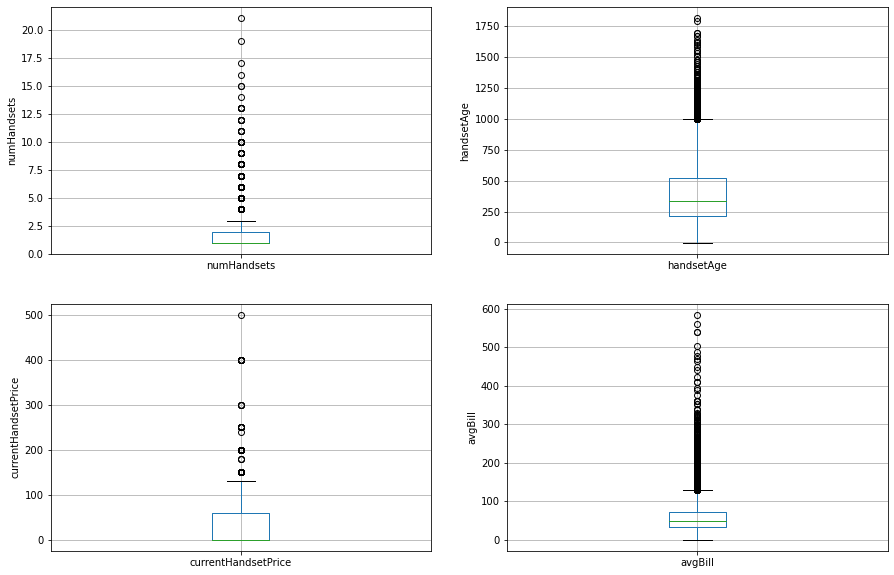

In [59]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='numHandsets')
fig.set_title('')
fig.set_ylabel('numHandsets')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='handsetAge')
fig.set_title('')
fig.set_ylabel('handsetAge')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='currentHandsetPrice')
fig.set_title('')
fig.set_ylabel('currentHandsetPrice')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='avgBill')
fig.set_title('')
fig.set_ylabel('avgBill')

### Figure 2. Draw boxplots to visualize outliers

Text(0, 0.5, 'avgOutCalls')

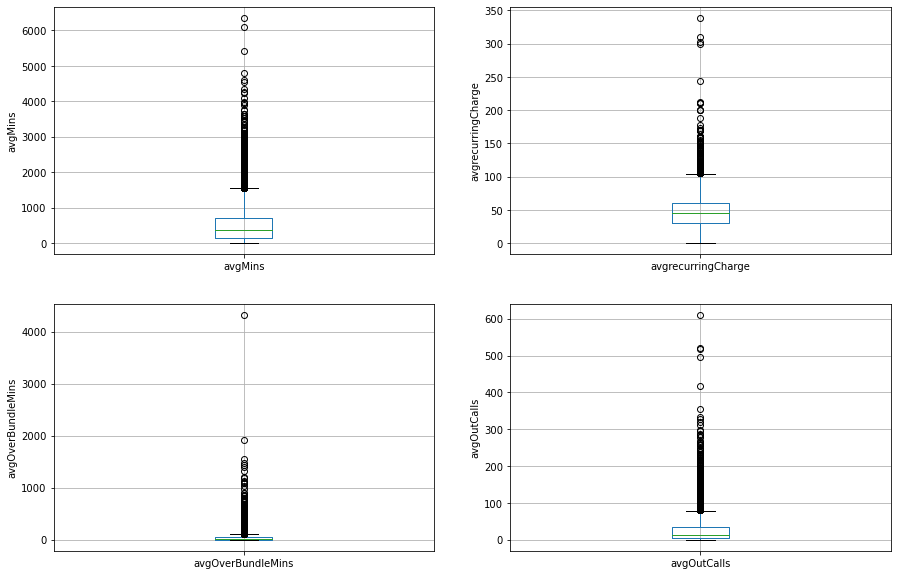

In [60]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='avgMins')
fig.set_title('')
fig.set_ylabel('avgMins')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='avgrecurringCharge')
fig.set_title('')
fig.set_ylabel('avgrecurringCharge')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='avgOverBundleMins')
fig.set_title('')
fig.set_ylabel('avgOverBundleMins')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='avgOutCalls')
fig.set_title('')
fig.set_ylabel('avgOutCalls')

### Figure 3. Draw boxplots to visualize outliers

Text(0, 0.5, 'lastMonthCustomerCareCalls')

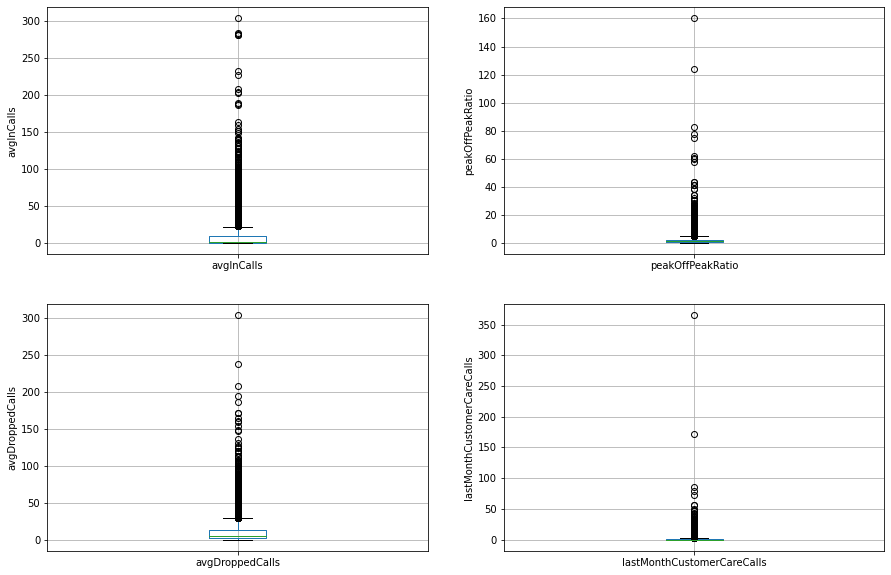

In [61]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='avgInCalls')
fig.set_title('')
fig.set_ylabel('avgInCalls')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='peakOffPeakRatio')
fig.set_title('')
fig.set_ylabel('peakOffPeakRatio')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='avgDroppedCalls')
fig.set_title('')
fig.set_ylabel('avgDroppedCalls')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='lastMonthCustomerCareCalls')
fig.set_title('')
fig.set_ylabel('lastMonthCustomerCareCalls')
    

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables
- Now, I will plot the histograms to check distributions to find out if they are normal or skewed.
- If the variable follows normal distribution, then I will do Extreme Value Analysis.
- Otherwise if they are skewed, I will find IQR (Interquantile range).

### Diagram 1. Plot histogram to check distribution

Text(0, 0.5, 'churn')

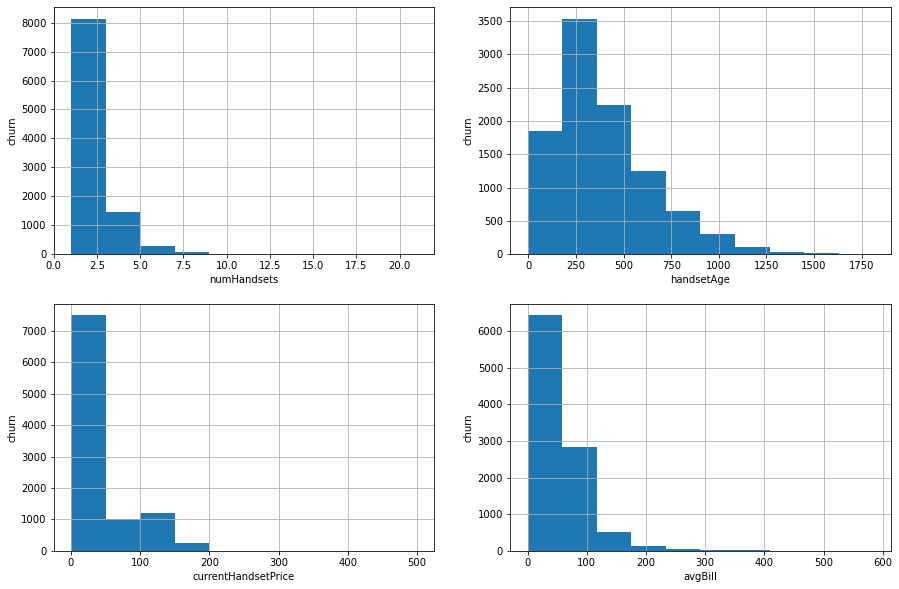

In [63]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.numHandsets.hist(bins=10)
fig.set_xlabel('numHandsets')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df.handsetAge.hist(bins=10)
fig.set_xlabel('handsetAge')
fig.set_ylabel('churn')

plt.subplot(2, 2, 3)
fig = df.currentHandsetPrice.hist(bins=10)
fig.set_xlabel('currentHandsetPrice')
fig.set_ylabel('churn')

plt.subplot(2, 2, 4)
fig = df.avgBill.hist(bins=10)
fig.set_xlabel('avgBill')
fig.set_ylabel('churn')

### Diagram 2. Plot histogram to check distribution

Text(0, 0.5, 'churn')

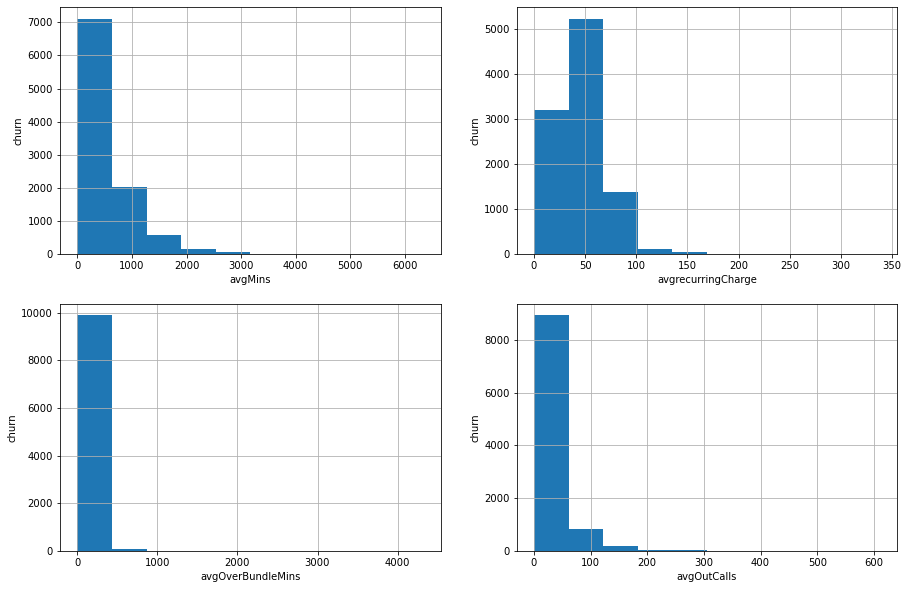

In [64]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.avgMins.hist(bins=10)
fig.set_xlabel('avgMins')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df.avgrecurringCharge.hist(bins=10)
fig.set_xlabel('avgrecurringCharge')
fig.set_ylabel('churn')

plt.subplot(2, 2, 3)
fig = df.avgOverBundleMins.hist(bins=10)
fig.set_xlabel('avgOverBundleMins')
fig.set_ylabel('churn')

plt.subplot(2, 2, 4)
fig = df.avgOutCalls.hist(bins=10)
fig.set_xlabel('avgOutCalls')
fig.set_ylabel('churn')

### Diagram 3. Plot histogram to check distribution

Text(0, 0.5, 'churn')

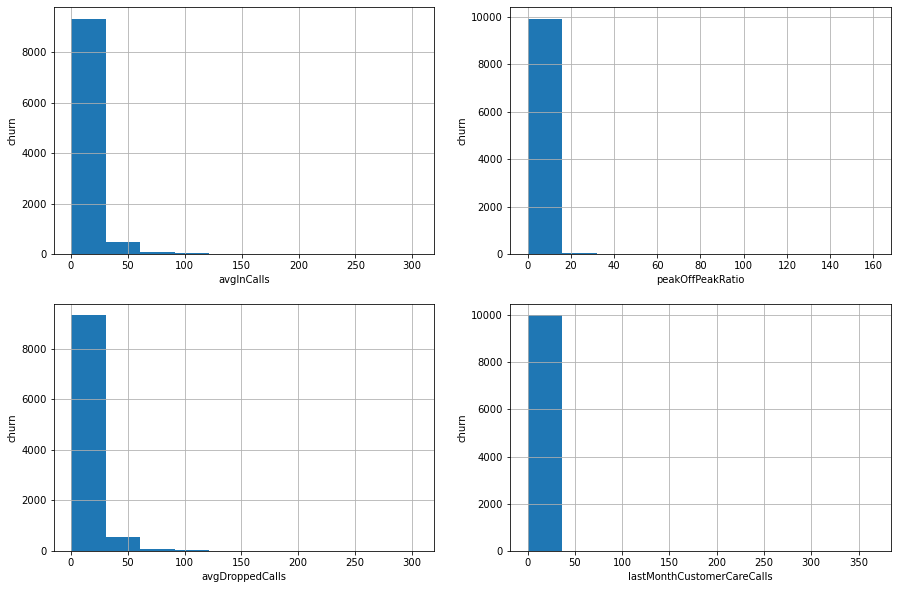

In [65]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.avgInCalls.hist(bins=10)
fig.set_xlabel('avgInCalls')
fig.set_ylabel('churn')

plt.subplot(2, 2, 2)
fig = df.peakOffPeakRatio.hist(bins=10)
fig.set_xlabel('peakOffPeakRatio')
fig.set_ylabel('churn')

plt.subplot(2, 2, 3)
fig = df.avgDroppedCalls.hist(bins=10)
fig.set_xlabel('avgDroppedCalls')
fig.set_ylabel('churn')


plt.subplot(2, 2, 4)
fig = df.lastMonthCustomerCareCalls.hist(bins=10)
fig.set_xlabel('lastMonthCustomerCareCalls')
fig.set_ylabel('churn')

We can see that all the 12 variables are skewed. So, I will use interquantile range to find outliers.

### Find outliers for numHandsets variable

In [66]:
IQR = df.numHandsets.quantile(0.75) - df.numHandsets.quantile(0.25)
Lower_fence = df.numHandsets.quantile(0.25) - (IQR * 3)
Upper_fence = df.numHandsets.quantile(0.75) + (IQR * 3)
print('numHandsets outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

numHandsets outliers are values < -2.0 or > 5.0


For numHandsets, the minimum and maximum values are 1.0 and 21.0. So, the outliers are values > 5.0.

### Find outliers for handsetAge variable

In [67]:
IQR = df.handsetAge.quantile(0.75) - df.handsetAge.quantile(0.25)
Lower_fence = df.handsetAge.quantile(0.25) - (IQR * 3)
Upper_fence = df.handsetAge.quantile(0.75) + (IQR * 3)
print('numHandsets outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

numHandsets outliers are values < -735.0 or > 1470.0


### Find outliers for urrentHandsetPrice variable

In [68]:
IQR = df.currentHandsetPrice.quantile(0.75) - df.currentHandsetPrice.quantile(0.25)
Lower_fence = df.currentHandsetPrice.quantile(0.25) - (IQR * 3)
Upper_fence = df.currentHandsetPrice.quantile(0.75) + (IQR * 3)
print('currentHandsetPrice outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

currentHandsetPrice outliers are values < -179.97 or > 239.96


### Find outliers for avgBill variable

In [69]:
IQR = df.avgBill.quantile(0.75) - df.avgBill.quantile(0.25)
Lower_fence = df.avgBill.quantile(0.25) - (IQR * 3)
Upper_fence = df.avgBill.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -81.9775 or > 187.0675


### Find outliers for avgMins variable

In [70]:
IQR = df.avgMins.quantile(0.75) - df.avgMins.quantile(0.25)
Lower_fence = df.avgMins.quantile(0.25) - (IQR * 3)
Upper_fence = df.avgMins.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -1525.0524999999998 or > 2384.8675


### Find outliers for avgrecurringCharge variable

In [71]:
IQR = df.avgrecurringCharge.quantile(0.75) - df.avgrecurringCharge.quantile(0.25)
Lower_fence = df.avgrecurringCharge.quantile(0.25) - (IQR * 3)
Upper_fence = df.avgrecurringCharge.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -59.97 or > 149.96


### Find outliers for avgOverBundleMins variable

In [72]:
IQR = df.avgOverBundleMins.quantile(0.75) - df.avgOverBundleMins.quantile(0.25)
Lower_fence = df.avgOverBundleMins.quantile(0.25) - (IQR * 3)
Upper_fence = df.avgOverBundleMins.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -131.25 or > 175.0


### Find outliers for avgOutCalls variable

In [73]:
IQR = df.avgOutCalls.quantile(0.75) - df.avgOutCalls.quantile(0.25)
Lower_fence = df.avgOutCalls.quantile(0.25) - (IQR * 3)
Upper_fence = df.avgOutCalls.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -87.99 or > 124.32


### Find outliers for avgInCalls variable

In [74]:
IQR = df.avgInCalls.quantile(0.75) - df.avgInCalls.quantile(0.25)
Lower_fence = df.avgInCalls.quantile(0.25) - (IQR * 3)
Upper_fence = df.avgInCalls.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -27.0 or > 36.0


### Find outliers for peakOffPeakRatio variable

In [75]:
IQR = df.peakOffPeakRatio.quantile(0.75) - df.peakOffPeakRatio.quantile(0.25)
Lower_fence = df.peakOffPeakRatio.quantile(0.25) - (IQR * 3)
Upper_fence = df.peakOffPeakRatio.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -4.3652702015000004 or > 7.638859492000001


### Find outliers for avgDroppedCalls variable

In [76]:
IQR = df.avgDroppedCalls.quantile(0.75) - df.avgDroppedCalls.quantile(0.25)
Lower_fence = df.avgDroppedCalls.quantile(0.25) - (IQR * 3)
Upper_fence = df.avgDroppedCalls.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -31.33 or > 45.67


### Find outliers for lastMonthCustomerCareCalls variable

In [77]:
IQR = df.lastMonthCustomerCareCalls.quantile(0.75) - df.lastMonthCustomerCareCalls.quantile(0.25)
Lower_fence = df.lastMonthCustomerCareCalls.quantile(0.25) - (IQR * 3)
Upper_fence = df.lastMonthCustomerCareCalls.quantile(0.75) + (IQR * 3)
print('avgBill outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

avgBill outliers are values < -3.99 or > 5.32


# SECTION 8. Declare Feature Vector and Target Variable

X is the data file after eliminating column churn.
Extract the RainTomorrow column to y-target variable

In [78]:
X = df.drop(['customer', 'churn'], axis=1) 

y = df['churn']

In [79]:
y.head()

0     false
1     false
2     false
3     false
4     false
Name: churn, dtype: object

In [80]:
y.value_counts()

 false    5000
 true     5000
Name: churn, dtype: int64

The dataset is prefectly balanced

# SECTION 9. Train_test_Split. Split data into separate training and test set

In [81]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 31), (2000, 31))

# SECTION 10. Feature Engineering

### Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.
### I will carry out feature engineering on different types of variables.
### First, I will display the categorical and numerical variables again separately.

### Check data types in X_train

In [83]:
X_train.dtypes

age                             int64
occupation                     object
regionType                     object
marriageStatus                 object
children                       object
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                     object
currentHandsetPrice           float64
creditRating                   object
homeOwner                      object
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime    

In [84]:
y_test[1:10]

898      false
2398     false
5906      true
2343     false
8225      true
5506      true
6451      true
2670     false
3497     false
Name: churn, dtype: object

In [85]:
y_train.describe()

count       8000
unique         2
top        false
freq        4012
Name: churn, dtype: object

In [86]:
y_train.head()

7389      true
9275      true
2995     false
5316      true
356      false
Name: churn, dtype: object

In [87]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['occupation',
 'regionType',
 'marriageStatus',
 'children',
 'smartPhone',
 'creditRating',
 'homeOwner',
 'creditCard']

### Display numerical variables

In [88]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'income',
 'numHandsets',
 'handsetAge',
 'currentHandsetPrice',
 'avgBill',
 'avgMins',
 'avgrecurringCharge',
 'avgOverBundleMins',
 'avgRoamCalls',
 'callMinutesChangePct',
 'billAmountChangePct',
 'avgReceivedMins',
 'avgOutCalls',
 'avgInCalls',
 'peakOffPeakRatio',
 'peakOffPeakRatioChangePct',
 'avgDroppedCalls',
 'lifeTime',
 'lastMonthCustomerCareCalls',
 'numRetentionCalls',
 'numRetentionOffersAccepted',
 'newFrequentNumbers']

In [89]:
# Engineering missing values in numerical variables.
# Check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

age                           0
income                        0
numHandsets                   0
handsetAge                    0
currentHandsetPrice           0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
dtype: int64

In [90]:
# Check missing values in numerical variables in y_train

y_train.isnull().sum()

0

In [91]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

age                           0
income                        0
numHandsets                   0
handsetAge                    0
currentHandsetPrice           0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
dtype: int64

In [92]:
# Check missing values in numerical variables in y_test

y_test.isnull().sum()

0

### Assumption
- We assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing
values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset,
we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

- We will impute missing values with the appropriate statistical measures of the data, in this case median.
Imputation should be done over the training set, and then propagated to the test set. It means that the statistical
measures to be used to fill missing values both in train and test set, should be extracted from the train set only.
This is to avoid overfitting.

Impute missing values in X_train and X_test with respective column median in X_train.
There are no missing values

In [ ]:
# for df1 in [X_train, X_test]:
#    for col in numerical:
#         col_median=X_train[col].median()
#         df1[col].fillna(col_median, inplace=True)     

In [96]:
# Again check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

age                           0
income                        0
numHandsets                   0
handsetAge                    0
currentHandsetPrice           0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
dtype: int64

In [97]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

age                           0
income                        0
numHandsets                   0
handsetAge                    0
currentHandsetPrice           0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

### Engineering missing values in categorical variables

In [98]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

occupation        0.0
regionType        0.0
marriageStatus    0.0
children          0.0
smartPhone        0.0
creditRating      0.0
homeOwner         0.0
creditCard        0.0
dtype: float64

Impute missing categorical variables with most frequent value.
No missing values

In [1]:
# for df2 in [X_train, X_test]:
#     df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
#     df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
#     df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
#     df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [102]:
# Check missing values in in y_test

y_test.isnull().sum()

0

Impute missing values into y_test with the most frequent value. No missing values

In [104]:
# Check missing values in in y_test

y_test.isnull().sum()

0

In [105]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

occupation        0
regionType        0
marriageStatus    0
children          0
smartPhone        0
creditRating      0
homeOwner         0
creditCard        0
dtype: int64

In [106]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

occupation        0
regionType        0
marriageStatus    0
children          0
smartPhone        0
creditRating      0
homeOwner         0
creditCard        0
dtype: int64

In [107]:
# As a final check, I will check for missing values in X_train and X_test.

In [108]:
# check missing values in X_train

X_train.isnull().sum()

age                           0
occupation                    0
regionType                    0
marriageStatus                0
children                      0
income                        0
numHandsets                   0
handsetAge                    0
smartPhone                    0
currentHandsetPrice           0
creditRating                  0
homeOwner                     0
creditCard                    0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
dtype: i

In [109]:
# check missing values in X_test

X_test.isnull().sum()

age                           0
occupation                    0
regionType                    0
marriageStatus                0
children                      0
income                        0
numHandsets                   0
handsetAge                    0
smartPhone                    0
currentHandsetPrice           0
creditRating                  0
homeOwner                     0
creditCard                    0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
numRetentionCalls             0
numRetentionOffersAccepted    0
newFrequentNumbers            0
dtype: i

We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables.
- We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. 
- we will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [111]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['numHandsets'] = max_value(df3, 'numHandsets', 5.0)
    df3['handsetAge'] = max_value(df3, 'handsetAge', 1470.0)
    df3['currentHandsetPrice'] = max_value(df3, 'currentHandsetPrice', 239.96)
    df3['avgBill'] = max_value(df3, 'avgBill', 187.07)
    
    df3['avgMins'] = max_value(df3, 'avgMins', 2384.87)
    df3['avgrecurringCharge'] = max_value(df3, 'avgrecurringCharge', 149.96)
    df3['avgOverBundleMins'] = max_value(df3, 'avgOverBundleMins', 175.0)
    df3['avgOutCalls'] = max_value(df3, 'avgOutCalls', 124.32)
    
    df3['avgInCalls'] = max_value(df3, 'avgInCalls', 36)
    df3['peakOffPeakRatio'] = max_value(df3, 'peakOffPeakRatio', 7.64)
    df3['avgDroppedCalls'] = max_value(df3, 'avgDroppedCalls', 45.67)
    df3['lastMonthCustomerCareCalls'] = max_value(df3, 'lastMonthCustomerCareCalls', 5.32)

In [112]:
X_train.numHandsets.max(), X_test.numHandsets.max()

(5.0, 5.0)

In [113]:
X_train.handsetAge.max(), X_test.handsetAge.max()

(1470.0, 1470.0)

In [114]:
X_train.currentHandsetPrice.max(), X_test.currentHandsetPrice.max()

(239.96, 239.96)

In [115]:
X_train.avgBill.max(), X_test.avgBill.max()

(187.07, 187.07)

In [116]:
X_train.avgrecurringCharge.max(), X_test.avgrecurringCharge.max()

(149.96, 149.96)

In [117]:
X_train.avgOverBundleMins.max(), X_test.avgOverBundleMins.max()

(175.0, 175.0)

In [118]:
X_train.avgOutCalls.max(), X_test.avgOutCalls.max()

(124.32, 124.32)

In [119]:
X_train.avgInCalls.max(), X_test.avgInCalls.max()

(36.0, 36.0)

In [120]:
X_train.peakOffPeakRatio.max(), X_test.peakOffPeakRatio.max()

(7.64, 7.64)

In [121]:
X_train.lastMonthCustomerCareCalls.max(), X_test.lastMonthCustomerCareCalls.max()

(5.32, 5.32)

In [122]:
X_train[numerical].describe()

,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.344500,4.287125,1.749000,391.027250,35.535612,57.568070,511.155465,46.091857,32.183600,1.218824,...,23.909521,6.906459,1.945283,0.016711,9.227696,18.922500,1.105354,0.046875,0.022375,0.194750
std,22.150094,3.135788,1.076752,255.791741,56.110773,36.821317,497.435203,22.937890,51.733507,6.378080,...,28.793658,10.255680,1.797723,9.971557,10.821581,9.629659,1.782918,0.231159,0.163180,0.641579
min,0.000000,0.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-41.322736,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,210.000000,0.000000,33.387500,151.250000,30.000000,0.000000,0.000000,...,3.000000,0.000000,0.774487,-6.662233,1.670000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,5.000000,1.000000,341.000000,0.000000,48.995000,356.750000,44.990000,3.000000,0.000000,...,13.330000,2.000000,1.398383,0.010045,5.330000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,526.000000,39.990000,71.885000,707.312500,59.990000,43.312500,0.240000,...,33.670000,9.000000,2.484822,6.496793,12.330000,24.000000,1.330000,0.000000,0.000000,0.000000
max,98.000000,9.000000,5.000000,1470.000000,239.960000,187.070000,2384.870000,149.960000,175.000000,177.990000,...,124.320000,36.000000,7.640000,37.779743,45.670000,61.000000,5.320000,4.000000,4.000000,3.000000


We can now see that the outliers in numHandsets,..., lastMonthCustomerCareCalls columns are capped.

## Encode categorical variables

In [123]:
categorical

['occupation',
 'regionType',
 'marriageStatus',
 'children',
 'smartPhone',
 'creditRating',
 'homeOwner',
 'creditCard']

In [124]:
X_train[categorical].head()

,occupation,regionType,marriageStatus,children,smartPhone,creditRating,homeOwner,creditCard
7389,,suburban,no,false,true,C,true,false
9275,,town,yes,true,true,C,false,true
2995,,,unknown,false,true,B,false,true
5316,professional,town,yes,true,true,A,false,true
356,professional,suburban,yes,false,true,A,false,true


In [125]:
X_train.head()

,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
7389,0,,suburban,no,false,0,2.0,417.0,true,149.99,...,51.00,12.67,0.562190,2.267979,12.00,14,5.32,0,0,0
9275,40,,town,yes,true,6,1.0,372.0,true,0.00,...,0.00,0.00,0.000000,4.987395,0.00,13,0.00,0,0,0
2995,26,,,unknown,false,8,1.0,416.0,true,0.00,...,124.32,36.00,0.983009,-3.010604,21.67,14,2.33,0,0,0
5316,50,professional,town,yes,true,9,2.0,510.0,true,29.99,...,14.33,4.00,1.800257,-0.693877,1.33,31,0.00,0,0,0
356,28,professional,suburban,yes,false,6,1.0,937.0,true,0.00,...,7.00,0.33,1.685714,-9.601254,4.67,31,0.00,0,0,0


### Encode marriageStatus variable

In [126]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['marriageStatus'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [127]:
X_train.head()

,age,occupation,regionType,marriageStatus_0,marriageStatus_1,children,income,numHandsets,handsetAge,smartPhone,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
7389,0,,suburban,0,1,false,0,2.0,417.0,true,...,51.00,12.67,0.562190,2.267979,12.00,14,5.32,0,0,0
9275,40,,town,1,0,true,6,1.0,372.0,true,...,0.00,0.00,0.000000,4.987395,0.00,13,0.00,0,0,0
2995,26,,,1,1,false,8,1.0,416.0,true,...,124.32,36.00,0.983009,-3.010604,21.67,14,2.33,0,0,0
5316,50,professional,town,1,0,true,9,2.0,510.0,true,...,14.33,4.00,1.800257,-0.693877,1.33,31,0.00,0,0,0
356,28,professional,suburban,1,0,false,6,1.0,937.0,true,...,7.00,0.33,1.685714,-9.601254,4.67,31,0.00,0,0,0


In [128]:
X_train.columns

Index(['age', 'occupation', 'regionType', 'marriageStatus_0',
       'marriageStatus_1', 'children', 'income', 'numHandsets', 'handsetAge',
       'smartPhone', 'currentHandsetPrice', 'creditRating', 'homeOwner',
       'creditCard', 'avgBill', 'avgMins', 'avgrecurringCharge',
       'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct',
       'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls',
       'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls',
       'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers'],
      dtype='object')

We can see that two additional variables marriageStatus_0 and marriageStatus_1 are created from RainToday variable.

In [129]:
# Now, I will create the X_train training set.

X_train = pd.concat([X_train[numerical], X_train[['marriageStatus_0', 'marriageStatus_1']],
                     pd.get_dummies(X_train.occupation), 
                     pd.get_dummies(X_train.regionType),
                     pd.get_dummies(X_train.children),
                     pd.get_dummies(X_train.smartPhone),
                     pd.get_dummies(X_train.creditRating),
                     pd.get_dummies(X_train.homeOwner)], axis=1)

In [130]:
X_train.head()

,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,...,true,A,B,C,D,E,F,G,false,true
7389,0,0,2.0,417.0,149.99,35.84,499.50,45.03,0.00,0.00,...,1,0,0,1,0,0,0,0,0,1
9275,40,6,1.0,372.0,0.00,34.99,0.00,44.99,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
2995,26,8,1.0,416.0,0.00,65.82,1193.75,79.99,0.25,0.00,...,1,0,1,0,0,0,0,0,1,0
5316,50,9,2.0,510.0,29.99,35.58,170.75,32.49,8.50,0.00,...,1,1,0,0,0,0,0,0,1,0
356,28,6,1.0,937.0,0.00,96.63,367.25,29.99,175.00,1.73,...,1,1,0,0,0,0,0,0,1,0


### Similarly, I will create the X_test testing set.

In [131]:
X_test = pd.concat([X_test[numerical], X_test[['marriageStatus_0', 'marriageStatus_1']], 
                    pd.get_dummies(X_test.occupation), 
                     pd.get_dummies(X_test.regionType),
                     pd.get_dummies(X_test.children),
                     pd.get_dummies(X_test.smartPhone),
                     pd.get_dummies(X_test.creditRating),
                     pd.get_dummies(X_test.homeOwner)], axis=1)

In [132]:
X_test.head()

,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,...,true,A,B,C,D,E,F,G,false,true
9394,0,0,2.0,75.0,129.99,187.07,1394.25,48.87,175.0,0.0,...,1,0,0,0,0,0,0,1,0,1
898,58,6,1.0,864.0,0.00,80.48,881.00,75.00,0.0,0.0,...,1,1,0,0,0,0,0,0,1,0
2398,0,0,5.0,22.0,199.99,62.24,611.25,58.79,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
5906,28,1,2.0,175.0,59.99,111.78,777.50,49.17,175.0,0.0,...,1,0,0,1,0,0,0,0,0,1
2343,24,6,1.0,582.0,0.00,31.39,884.50,44.99,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


# SECTION 11. Feature Scaling

In [133]:
X_train.describe()

,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,...,true,A,B,C,D,E,F,G,false,true
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,30.344500,4.287125,1.749000,391.027250,35.535612,57.568070,511.155465,46.091857,32.183600,1.218824,...,0.902375,0.168250,0.378750,0.169875,0.098750,0.121000,0.025000,0.038375,0.655875,0.344125
std,22.150094,3.135788,1.076752,255.791741,56.110773,36.821317,497.435203,22.937890,51.733507,6.378080,...,0.296825,0.374112,0.485106,0.375546,0.298345,0.326148,0.156135,0.192112,0.475112,0.475112
min,0.000000,0.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,210.000000,0.000000,33.387500,151.250000,30.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,5.000000,1.000000,341.000000,0.000000,48.995000,356.750000,44.990000,3.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,7.000000,2.000000,526.000000,39.990000,71.885000,707.312500,59.990000,43.312500,0.240000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,98.000000,9.000000,5.000000,1470.000000,239.960000,187.070000,2384.870000,149.960000,175.000000,177.990000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
cols = X_train.columns

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [136]:
type(X_train)

numpy.ndarray

In [137]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [138]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [139]:
X_train.describe()

,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,...,true,A,B,C,D,E,F,G,false,true
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.309638,0.476347,0.187250,0.267997,0.148090,0.307735,0.214333,0.307361,0.183906,0.006848,...,0.902375,0.168250,0.378750,0.169875,0.098750,0.121000,0.025000,0.038375,0.655875,0.344125
std,0.226021,0.348421,0.269188,0.173536,0.233834,0.196832,0.208580,0.152960,0.295620,0.035834,...,0.296825,0.374112,0.485106,0.375546,0.298345,0.326148,0.156135,0.192112,0.475112,0.475112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.145183,0.000000,0.178476,0.063421,0.200053,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.346939,0.555556,0.000000,0.234057,0.000000,0.261907,0.149589,0.300013,0.017143,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.489796,0.777778,0.250000,0.359566,0.166653,0.384268,0.296583,0.400040,0.247500,0.001348,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
# X_train.isnull().sum()

### We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

# SECTION 12. Model Training

In [141]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# SECTION 12B. Decision Tree

In [142]:
# Train a decision tree model on the training set
from sklearn.tree import DecisionTreeClassifier


# Instantiate the model
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 100, random_state=0)


# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=0)

# SECTION 13. Predict Results

In [143]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([' true', ' false', ' false', ..., ' false', ' false', ' false'],
      dtype=object)

### Predict_proba method.

- predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

- 0 is for probability of no churn and 1 is for probability of churn.

In [144]:
# probability of getting output as 0 - no churn

logreg.predict_proba(X_test)[:,0]

array([0.45902115, 0.59825058, 0.63365768, ..., 0.50478292, 0.54409186,
       0.59138848])

In [145]:
# probability of getting output as 1 - churn

logreg.predict_proba(X_test)[:,1]

array([0.54097885, 0.40174942, 0.36634232, ..., 0.49521708, 0.45590814,
       0.40861152])

# SECTION 13B. Predict Results

In [146]:
y_pred_test_clf = clf.predict(X_test)

y_pred_test_clf

array([' true', ' true', ' false', ..., ' false', ' false', ' true'],
      dtype=object)

### Predict_proba method.
- predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.
- 0 is for probability of no churn and 1 is for probability of churn.

### Probability of getting output as 0 - no churn

In [147]:
clf.predict_proba(X_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [148]:
clf.predict_proba(X_test)[:,0]

array([0., 0., 1., ..., 1., 1., 0.])

### Probability of getting output as 1 - churn

In [149]:
logreg.predict_proba(X_test)[:,1]

array([0.54097885, 0.40174942, 0.36634232, ..., 0.49521708, 0.45590814,
       0.40861152])

# SECTION 14. Check accuracy score for LogReg Model 

In [150]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6020


In [151]:
# Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

In [152]:
# Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [153]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([' true', ' true', ' false', ..., ' false', ' true', ' true'],
      dtype=object)

In [154]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5867


In [155]:
# Check for overfitting and underfitting

In [156]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.5867
Test set score: 0.6020


- The training-set accuracy score is 0.5867 while the test-set accuracy to be 0.6020.
- These two values are quite comparable.
- So, there is no question of overfitting.

### In Logistic Regression, we use default value of C = 1.
- It provides good performance with approximately 85% accuracy on both the training and the test set.
- But the model performance on both the training and test set are very comparable.
- It is likely the case of underfitting.
- We will increase C and fit a more flexible model.

### Fit the Logsitic Regression model with C=100

In [159]:
# Instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# Fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [160]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.5917
Test set score: 0.5965


- We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy.
- So, we can conclude that a more complex model should perform better.

### Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [163]:
# Instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

# Fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

### Print the scores on training and test set

In [164]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.5683
Test set score: 0.5840


- So, if we use more regularized model by setting C=0.01.
- Then both the training and test set accuracy decrease relatiev to the default parameters.

### Compare model accuracy with null accuracy
- So, the model accuracy is 0.8484.
- But, we cannot say that our model is very good based on the above accuracy.
- We must compare it with the null accuracy.
- Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
- So, we should first check the class distribution in the test set.

In [167]:
# Check class distribution in test set

y_test.value_counts()

 true     1012
 false     988
Name: churn, dtype: int64

- We can see that the occurences of most frequent class is 1012.
- So, we can calculate null accuracy by dividing 1012 by total number of occurences.

In [168]:
# Check null accuracy score

null_accuracy = (1012/(1012+988))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5060


- We can see that our model accuracy score is 0.58 but null accuracy score is 0.51.
- So, we can conclude that our Logistic Regression model is doing a good job in predicting the class labels.

- Now, based on the above analysis we can conclude that our classification model accuracy is very good.
- Our model is doing a very good job in terms of predicting the class labels.

- But, it does not give the underlying distribution of values.
- Also, it does not tell anything about the type of errors our classifer is making.

- We have another tool called Confusion matrix that comes to our rescue.

# SECTION 14B. Check accuracy score for Decision Tree Model 

In [169]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test_clf)))

Model accuracy score: 0.5350


In [170]:
y_pred_train_clf = clf.predict(X_train)

y_pred_train_clf

array([' true', ' true', ' false', ..., ' false', ' true', ' false'],
      dtype=object)

In [171]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_clf)))

Training-set accuracy score: 1.0000


In [172]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.5350


# SECTION 15. Confusion matrix 

### Print the Confusion Matrix and slice it into four pieces


In [173]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[611 377]
 [419 593]]

True Positives(TP) =  611

True Negatives(TN) =  593

False Positives(FP) =  377

False Negatives(FN) =  419


### The confusion matrix shows 597 + 564 = 1163 (58%) correct predictions and 448 + 391 = 839 incorrect predictions.
In this case, we have
- True Positives (Actual Positive:1 and Predict Positive:1) - 597
- True Negatives (Actual Negative:0 and Predict Negative:0) - 564
- False Positives (Actual Negative:0 but Predict Positive:1) - 391 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 448 (Type II error)

### Visualize confusion matrix with seaborn heatmap

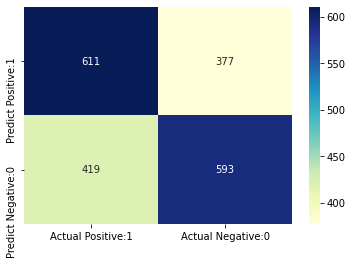

In [175]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# SECTION 16. Classification metrices

### Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

### We can print a classification report as follows

In [176]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       false       0.59      0.62      0.61       988
        true       0.61      0.59      0.60      1012

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



## Classification accuracy

In [177]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [178]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6020


## Classification error

In [179]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3980


## Precision
- Precision can be defined as the percentage of correctly predicted positive outcomes out of
all the predicted positive outcomes.
- It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). So, Precision identifies the proportion of correctly predicted positive outcome.
It is more concerned with the positive class than the negative class.
- Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [180]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6184


## Recall
- Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
- It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN).
- Recall is also called Sensitivity. Recall identifies the proportion of correctly predicted actual positives.
- Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [182]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.5932


In [183]:
# True Positive Rate

In [184]:
# True Positive Rate is synonymous with Recall.

In [185]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.5932


In [186]:
# False Positive Rate

In [187]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3887


In [188]:
# Specificity

In [189]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6113


## f1-score
- f1-score is the weighted harmonic mean of precision and recall or the harmonic mean of precision and recall.
- The best possible f1-score would be 1.0 and the worst would be 0.0.
- So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
- The weighted average of f1-score should be used to compare classifier models, not global accuracy.

### Support is the actual number of occurrences of the class in our dataset.

# SECTION 17. Adjusting the threshold level 

In [192]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.45902115, 0.54097885],
       [0.59825058, 0.40174942],
       [0.63365768, 0.36634232],
       [0.52759022, 0.47240978],
       [0.56144151, 0.43855849],
       [0.47024237, 0.52975763],
       [0.37159619, 0.62840381],
       [0.4286931 , 0.5713069 ],
       [0.61764907, 0.38235093],
       [0.69665201, 0.30334799]])

### Observations

- In each row, the numbers sum to 1.

- There are 2 columns which correspond to 2 classes - 0 and 1:

        - Class 0 - predicted probability that there is no churn.
    
        - Class 1 - predicted probability that there is churn.

- Importance of predicted probabilities:

- We can rank the observations by probability of churn or no churn.

### predict_proba process:

- Predicts the probabilities
    
- Choose the class with the highest probability

### Classification threshold level:

- There is a classification threshold level of 0.5.

- Class 1 - probability of rain is predicted if probability > 0.5.

- Class 0 - probability of no rain is predicted if probability < 0.5.

In [193]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No churn (0)', 'Prob of - churn (1)'])

y_pred_prob_df

,Prob of - No churn (0),Prob of - churn (1)
0,0.459021,0.540979
1,0.598251,0.401749
2,0.633658,0.366342
3,0.527590,0.472410
4,0.561442,0.438558
5,0.470242,0.529758
6,0.371596,0.628404
7,0.428693,0.571307
8,0.617649,0.382351
9,0.696652,0.303348


In [194]:
# print the first 10 predicted probabilities for class 1 - Probability of churn

logreg.predict_proba(X_test)[0:10, 1]

array([0.54097885, 0.40174942, 0.36634232, 0.47240978, 0.43855849,
       0.52975763, 0.62840381, 0.5713069 , 0.38235093, 0.30334799])

In [195]:
# store the predicted probabilities for class 1 - Probability of churn

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

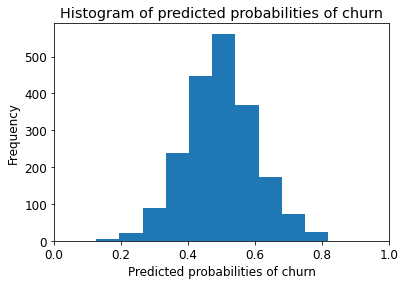

In [196]:
# Plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of churn')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of churn')
plt.ylabel('Frequency')

Observations: We can see that the above histogram is highly normal.

## Lower the threshold

In [197]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    cm1=0    
    y_pred1 = logreg.predict_proba(X_test)[:,1]    
    y_pred1 = y_pred1.reshape(-1,1)    
    y_pred2 = binarize(y_pred1, i/10)    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[   0    0  988]
 [   0    0 1012]
 [   0    0    0]] 

 with 0 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0 

 Sensitivity:  nan 

 Specificity:  nan 



With 0.2 threshold the Confusion Matrix is  

 [[   0    0    4  984]
 [   0    0    1 1011]
 [   0    0    0    0]
 [   0    0    0    0]] 

 with 0 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0 

 Sensitivity:  nan 

 Specificity:  nan 



With 0.3 threshold the Confusion Matrix is  

 [[  0   0  37 951]
 [  0   0  16 996]
 [  0   0   0   0]
 [  0   0   0   0]] 

 with 0 correct predictions,  

 0 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.0 

 Sensitivity:  nan 

 Specificity:  nan 



With 0.4 threshold the Confusion Matrix is  

 [[  0   0 227 761]
 [  0   0 112 900]
 [  0 

In [198]:
y_pred2

array([['Yes'],
       ['Yes'],
       ['No'],
       ...,
       ['Yes'],
       ['Yes'],
       ['Yes']], dtype='<U3')

# Comments

In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
Threshold can be adjusted to increase sensitivity or specificity.
Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
We can see that increasing the threshold level results in increased accuracy.
Adjusting the threshold level should be one of the last step you do in the model-building process.

# Section 18. Receiver Operating Characteristic Curve - Area Under Curve (ROC-AUC)

Another tool to measure the classification model performance visually is ROC Curve.
ROC Curve stands for Receiver Operating Characteristic Curve.
An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point.
This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels.
So, an ROC Curve plots TPR vs FPR at different classification threshold levels.
If we lower the threshold levels, it may result in more items being classified as positve.
It will increase both True Positives (TP) and False Positives (FP).

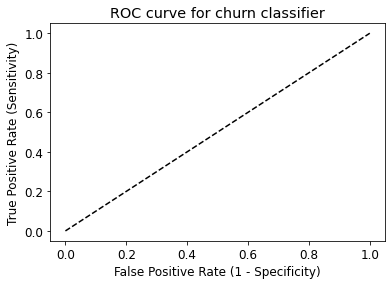

In [199]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for churn classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

## ROC-AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve.
It is a technique to compare classifier performance.
In this technique, we measure the area under the curve (AUC).
A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

### compute ROC AUC

In [200]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6296


## Remarks
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1.
So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

### Calculate cross-validated ROC AUC 

In [201]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.6112


# SECTION 19. k-Fold Cross Validation LogReg Model

### Applying 5-Fold Cross Validation

In [202]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.571875 0.59     0.58375  0.568125 0.575625]


We can summarize the cross-validation accuracy by calculating its mean.


### compute Average cross-validation score

In [203]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.5779


Our, original model score is found to be 0.6020. The average cross-validation score is 0.5779.
So, we can conclude that cross-validation does not result in performance improvement.

# SECTION 19B. k-Fold Cross Validation for Decision Tree Model

### Applying 5-Fold Cross Validation

In [211]:
scores_clf = cross_val_score(clf, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores_clf:{}'.format(scores_clf))

Cross-validation scores_clf:[0.5075   0.514375 0.526875 0.535625 0.541875]


### compute Average cross-validation score

In [212]:
print('Average cross-validation score_clf: {:.4f}'.format(scores_clf.mean()))

Average cross-validation score_clf: 0.5252


# SECTION 20. Hyperparameter Optimization using GridSearch CV 

In [204]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

### Examine the best model

In [205]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.5780


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


### Calculate GridSearch CV score on test set

In [206]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.5970


## Comments

Our original model test accuracy is 0.6020 while GridSearch CV accuracy is 0.5970.
We can see that GridSearch CV does not improve the performance for this particular model.

# SECTION 20B. Hyperparameter Optimization using GridSearch CV DeTree

In [221]:
parameters_clf = [{'criterion':['gini','entropy', 'log_loss'],'max_depth':[4,5,7,8,9,10,11]}]

grid_search_clf = GridSearchCV(estimator = clf,  
                           param_grid = parameters_clf,
                           scoring = 'accuracy',
                           cv = 8)

grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=100, random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [4, 5, 7, 8, 9, 10, 11]}],
             scoring='accuracy')

### Examine the best model

In [222]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_clf.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_clf.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_clf.best_estimator_))

GridSearch CV best score : 0.5832


Parameters that give the best results : 

 {'criterion': 'entropy', 'max_depth': 4}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# SECTION 21. Results and conclusion

### The logistic regression model accuracy score is 0.6020. So, the model does a very good job in predicting churn or no churn.

### Small number of observations predict that there will be churn. Majority of observations predict that there will be no churn.

### The model shows no signs of overfitting. Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better. Increasing the threshold level results in increased accuracy.

### ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will be churn or not.

### Our original model accuracy score is 0.6020 whereas accuracy score after RFECV is 0.5970. So, we can obtain approximately similar accuracy but with reduced set of features.

### In the original model, we have FP =   whereas FP1 =  . So, we get approximately same number of false positives. Also, FN =   whereas FN1 =  . So, we get slighly higher false negatives.

### Our original model score is found to be 0.6020. The average cross-validation score is 0.5970. So, we can conclude that cross-validation does not result in performance improvement.

### Our original model test accuracy is 0.6020 while GridSearch CV accuracy is 0.5970. We can see that GridSearch CV improve the performance for this particular model.